# Working with artist-data.csv

### Since this dataset comes from the web "vagalume"  in Brazil, we can see from these data some Brazilian people's preferences for singers and song styles.

### Questions I want to explore: 
### 1. What are the most popular singers and their corresponding genres?
### 2. Is there a correlation between an artist's genre and his or her popularity?

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_rows = 200

In [3]:
artists_df = pd.read_csv('artists-data.csv', delimiter=",", encoding='utf-8')

In [4]:
artists_df.sample(10)

,Artist,Genres,Songs,Popularity,Link
308,Jennette McCurdy,Pop; Romântico; Country,38.0,0.0,/jennette-mccurdy/
4133,Smoke City,Trip-Hop; Blues; Hip Hop,19.0,0.0,/smoke-city/
536,Videoclub,House; Electronica; Pop,4.0,0.1,/videoclub/
1398,Melosweet,Gospel/Religioso; Romântico; Instrumental,58.0,0.0,/melosweet/
636,Neil Young,Rock; Folk,517.0,2.6,/neil-young/
3059,Ramirez,Pop/Rock; Rock; Emocore,47.0,0.0,/ramirez/
2048,Of Monsters and Men,Indie,45.0,2.3,/of-monsters-and-men/
1595,Avenged Sevenfold,Hard Rock; Heavy Metal; Rock,119.0,5.3,/avenged-sevenfold/
2455,90sFlav,Lo-fi,6.0,0.0,/90sflav/
3345,Shaggy,Reggae,86.0,1.0,/shaggy/


In [61]:
artists_df[artists_df['Popularity'] > 100]

,Artist,Genres,Songs,Popularity,Link,genre_count
44,Beyoncé,Pop; R&B; Black Music,276.0,205.5,/beyonce/,3
334,Anitta,Pop; Dance; Funk Carioca,150.0,119.6,/anitta/,3
505,Sia,Trip-Hop; Pop; Romântico,199.0,135.1,/sia/,3
623,Ed Sheeran,Indie; Romântico; Pop/Rock,224.0,114.2,/ed-sheeran/,3
1017,Harpa Cristã,Gospel/Religioso,575.0,108.0,/harpa-crista/,1
1854,Eminem,Hip Hop; Rap,486.0,114.9,/eminem/,2
2023,Coldplay,Pop/Rock; Piano Rock; Soft Rock,232.0,107.4,/coldplay/,3
2734,Adele,Soul Music; Pop; R&B,80.0,119.3,/adele/,3


 Sure enough, Beyoncé’s influence is huge, and the second-ranked female singer is from Brazil. And we can find that the only hip-hop singer whose popularity is greater than 100 is Eminem.

___

Find a specific artist that I am intersted.

In [68]:
artists_filter = artists_df.loc[artists_df['Artist'] == 'Kanye West']

In [69]:
artists_filter

,Artist,Genres,Songs,Popularity,Link,genre_count
59,Kanye West,Hip Hop; R&B; Rap,298.0,14.0,/kanye-west/,3


 It turns out that Kanye West’s rap is not to the Brazilian people’s musical appetite.

Make a histogram of the DataFrame

array([[<Axes: title={'center': 'Songs'}>,
        <Axes: title={'center': 'Popularity'}>]], dtype=object)

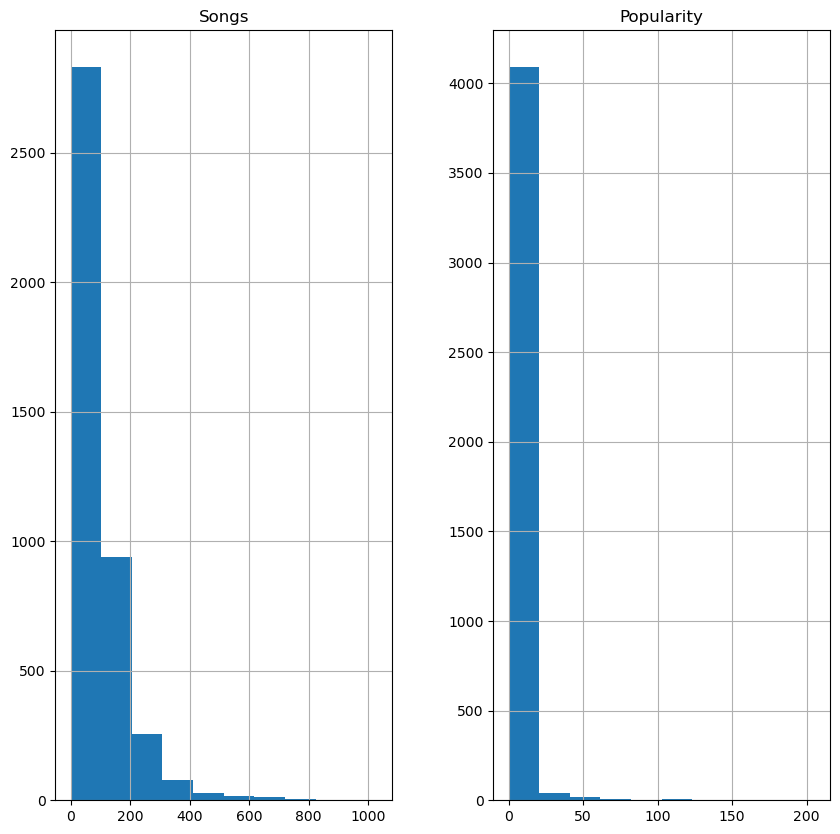

In [5]:
artists_df.hist(figsize=(10,10))

Sort the DataFrame from the character who has the highest `popularity` to the lowest.  

In [70]:
sorted_df = artists_df.sort_values(by='Popularity', ascending=False)
top_20_rows = sorted_df.head(20)
print(top_20_rows)

                         Artist                           Genres  Songs  \
44                      Beyoncé            Pop; R&B; Black Music  276.0   
505                         Sia         Trip-Hop; Pop; Romântico  199.0   
334                      Anitta         Pop; Dance; Funk Carioca  150.0   
2734                      Adele             Soul Music; Pop; R&B   80.0   
1854                     Eminem                     Hip Hop; Rap  486.0   
623                  Ed Sheeran       Indie; Romântico; Pop/Rock  224.0   
1017               Harpa Cristã                 Gospel/Religioso  575.0   
2023                   Coldplay  Pop/Rock; Piano Rock; Soft Rock  232.0   
2735                       Pink                    Pop/Rock; Pop  187.0   
250                Taylor Swift         Pop; Romântico; Pop/Rock  387.0   
2024            Imagine Dragons    Rock; Rock Alternativo; Indie  130.0   
335               Justin Bieber            Dance; Pop; Romântico  279.0   
869                    Lu

Sort the DataFrame from the character who has the lowest `popularity` to the highest. 

In [71]:
sorted_df = artists_df.sort_values(by='Popularity', ascending=True)
bottom_20_rows = sorted_df.head(20)
print(bottom_20_rows)

                Artist                         Genres  Songs  Popularity  \
4167      Johnny Clegg  World Music; Gospel/Religioso   34.0         0.0   
1971          Yung Joc      Hip Hop; Rap; Black Music   37.0         0.0   
1972  Christina Milian        Romântico; Hip Hop; Pop   62.0         0.0   
1973      Slum Village                   Hip Hop; Rap   31.0         0.0   
1974       Rene Fellix                   Hip Hop; Rap    8.0         0.0   
1975             Yusei                 Hip Hop; Lo-fi    6.0         0.0   
1976            Vloudy                  Hip Hop; Trap    2.0         0.0   
1977              Jhef              Hip Hop; Rap; R&B   23.0         0.0   
1978          Mystikal                   Hip Hop; Rap   80.0         0.0   
1970             Plies      Rap; Hip Hop; Black Music   86.0         0.0   
1979       Young Money              Hip Hop; Rap; R&B   29.0         0.0   
1981           Digga D                   Rap; Hip Hop   12.0         0.0   
1982      Da

Could there also be a connection between genre and popularity? Most of the artists in the table correspond to multiple genres. I first grouped the genres according to the artists, then calculated the average popularity of the genres, and selected the top ten to display.

In [17]:
import matplotlib.pyplot as plt

In [18]:
genres = artists_df['Genres'].astype(str)
popularity = artists_df['Popularity'].astype(str)

In [19]:
average_popularity = artists_df.groupby('Genres')['Popularity'].mean()

In [20]:
top_genres = average_popularity.nlargest(10)

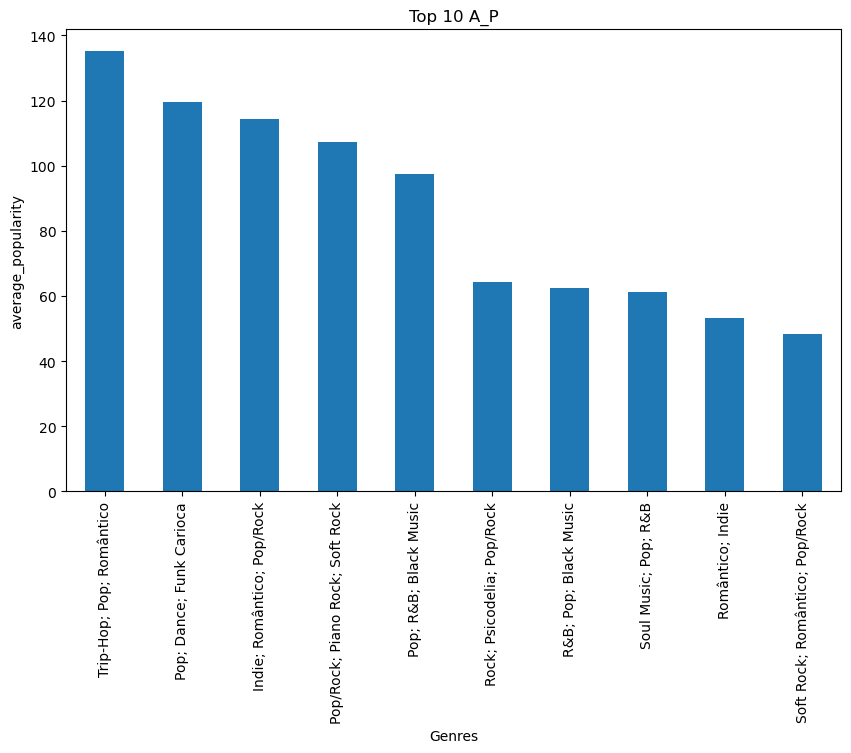

In [74]:
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('average_popularity')
plt.title('Top 10 A_P')
plt.show()

For me, this is the first time I have seen the music genre trip-hop. It turns out that for the Brazilian people, trip-hop music is one of their favorite.I think there is a correlation between genre and popularity. Hip hop does not appear in the top ten column charts. This result is also very similar to the table results of the bottom 20 genres and singers in popularity. Perhaps hip-hop singers are less popular in the Brazilian music market than singers who focus on pop, trip-hop and romantico styles.